# Lab of computational physics - EXR02
#### Barone Francesco Pio, AY 2021/22 UniPD

### 1. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
# this function takes a single char and maps it to int representation:
#   (char) '1' ->  1  (int)
#          ...
#          '9' ->  9
#          'a' ->  10 (int)
#          ...
#          'z' ->  35
def interpret_char(ch):
    try: return int(ch)
    except: return int(ord(ch) - ord('a') + 10)

# this function takes an int value and maps it to char representation:
#   (int) 1  -> '1'  (char)   ...    9  -> '9'
#         10 -> 'a'      ...         35 -> 'z'
def interpret_module(mod):
    if mod>9: return chr(mod + ord('a') - 10)
    return str(mod)

# this function takes an input string, reads it according to a base representation
#  and finally returns the number (! without the sign and identifier)
def read_base_string(stri, base):
    number = 0
    stri_len = len(stri) - 1
    for i in range(0, stri_len +1):
        # print(' reading', i, stri[i], interpret_char(stri[i]))
        number += interpret_char(stri[i]) * (base**(stri_len-i))
    return number

# this functions converts a number to the corresponding string representation
#  in a given base (! without the sign and identifier)
def number_to_representation(number, base):
    string = ''
    while number:
        string = interpret_module(number%base) + string
        number = number//base
    return string

# this function takes an input string and converts the representation to
#  a given target: bin, dec or hex.
def convert(stri, target):
    stri = stri.replace(" ", "")  # removing all spaces in the string
    stri = stri.lower()           # using only lowercased letters
    if stri[0] == '-': sign_isnegative = True
    else: sign_isnegative = False
    stri = stri.replace("-", "");   stri = stri.replace("+", "");
    
    if stri.startswith('0b'): # the input string represents a binary number
        number = (1 if stri[0] == '0' else -1) * read_base_string(stri[2:],2)
    elif stri.startswith('0x'): # the input string represents a hex number
        number = (1 if stri[0] == '0' else -1) * read_base_string(stri[2:],16)
    else: # the input string must be decimal
        number = read_base_string(stri,10)

    # print(' number in memory:', number)
    
    if target == 'dec':      out = number_to_representation(abs(number), 10)
    elif target == 'bin':    out = '0b' + number_to_representation(abs(number), 2)
    elif target == 'hex':    out = '0x' + number_to_representation(abs(number), 16)
    else:
        print('invalid target format')
        return 0
    
    return ('-' if sign_isnegative else '') + out

To test the previous functions, let us see their behaviour for known number representations.

| dec | bin | hex |
| --- | --- | --- |
| -23 | -0b10111 | -0x17 |
| 1233454 | 0b0b100101101001000101110 | 0x12d22e |

In [2]:
print(convert('-0b10111','dec'))   # expected  -23
print(convert('1233454','hex'))    # expected  0b100101101001000101110
print(convert('0x17','bin'))       # expected  0b10111

-23
0x12d22e
0b10111


### 2. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [3]:
def read_32bit_word(stri):
    # configuration of the function: for 32 bits use nbit_exponent, nbit_mantissa, bias = 8, 23, 127
    nbit_exponent, nbit_mantissa, bias = 8, 23, 127
    
    stri = stri.replace(" ", "")  # removing all spaces in the string
    nbit_exponent += 1;   mantissa, n = 1, 1;
    exponent = read_base_string(stri[1:nbit_exponent], 2)
    for i in stri[nbit_exponent:nbit_exponent+nbit_mantissa]:
        mantissa += (1 if i == '1' else 0) * (2**-n)
        n = n + 1
    print('exponent:', exponent,', mantissa:', mantissa)
    return (1 if stri[0]=='0' else -1) * (2**(exponent-bias)) * mantissa

In [4]:
print( read_32bit_word('0 00000111 11000000000000000000000') )

exponent: 7 , mantissa: 1.75
1.316553672920962e-36


### 3. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [5]:
up, down = 1.0, 1.0
while up*2 != float("+inf"): up *= 2
while down/2 != 0: down /= 2
print('upper limit:', up,', lower limit:', down)

upper limit: 8.98846567431158e+307 , lower limit: 5e-324


### 4. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [6]:
def determine_precision(var = 1.):
    tmp, count = 0, 0
    while var != tmp:
        count += 1
        tmp = var + 10**(-count)
    return 1-count

In [7]:
v = 1.
pr = determine_precision(v)
print('precision is up to 10 ^', pr)
print('in fact,', v, 'is different from', v + 10**pr, '=', v, '+ 10^',pr)
print(' but', v, 'turns out to be equal to', v + 10**(pr-1),'=', v ,'+ 10^',pr-1)

precision is up to 10 ^ -15
in fact, 1.0 is different from 1.000000000000001 = 1.0 + 10^ -15
 but 1.0 turns out to be equal to 1.0 = 1.0 + 10^ -16


### 5. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [23]:
from math import sqrt

def poly2_roots(a, b, c):
    return (-b - sqrt( (b*b)-(4*a*c) ))/(2*a), (-b + sqrt( (b*b)-(4*a*c) ))/(2*a)

def poly2_roots_rationalized(a, b, c):
    return 2*c/(-b+sqrt(b*b-4*a*c)), 2*c/(-b-sqrt(b*b-4*a*c))

print( poly2_roots(0.001, 1000, 0.001) )
print( poly2_roots_rationalized(0.001, 1000, 0.001) )

(-999999.999999, -9.999894245993346e-07)
(-1000010.5755125057, -1.000000000001e-06)


As a reference, the rationalized formula is
$$
x=\frac{b^2-b^2+4ac}{2a\cdot\Big(-b\mp\sqrt{b^2-4ac}\Big)}=\frac{2c}{-b\mp\sqrt{b^2-4ac}}
$$

First of all, let us state that because $b$ is much greater than $a$ and $c$, the actual value of $\sqrt{b^2-4ac}$ can be formally approximated in the form $\sqrt{b^2-4ac}\sim b + \delta$. 

The division between very small numbers tipically leads to unstable results. Let $x_1,x_2$ denote the solutions computed by the poly2_roots() function, and $\tilde{x_1},\tilde{x_2}$ the solutions computed by the rationalized function. $x_1$ does not lead to division between small numbers, as $ x_1=\frac{-b-\sqrt{b^2-4ac}}{2a} \sim \frac{-b-b-\delta}{2a}$. Instead, $x_2=\frac{-b+\sqrt{b^2-4ac}}{2a} \sim \frac{-b+b+\delta}{2a} = \frac{\delta}{2a}$, performs the division between very small values, which leads to unstable behaviour.

The same reasons can be extended to $\tilde{x_1},\tilde{x_2}$.
$$ \tilde{x_1} = \frac{2c}{-b +\sqrt{b^2-4ac}} \sim \frac{2c}{-b +b+\delta} = \frac{2c}{\delta} \;\; (unstable)$$
$$ \tilde{x_2} = \frac{2c}{-b -\sqrt{b^2-4ac}} \sim \frac{2c}{-b -b-\delta} = \frac{2c}{-2b-\delta} \sim -\frac{c}{b}$$
Therefore, the optimal function is given by $(x_1, \tilde{x_2})$.

In [25]:
def poly2_optimal(a,b,c):
    return (-b - sqrt( (b*b)-(4*a*c) ))/(2*a) , 2*c/(-b-sqrt(b*b-4*a*c))

### 6. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

delta=10^-2 -> 1.010000000000001
delta=10^-4 -> 1.0000999999998899
delta=10^-6 -> 1.0000009999177333
delta=10^-8 -> 1.0000000039225287
delta=10^-10 -> 1.000000082840371
delta=10^-12 -> 1.0000889005833413
delta=10^-14 -> 0.9992007221626509


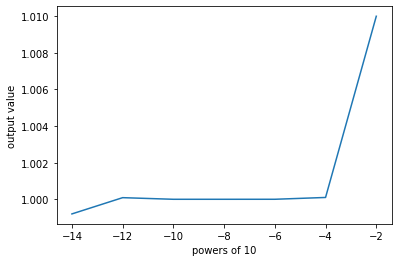

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

def f(x): return x*(x-1)
def derivative(fun, point, delta):   return (fun(point+delta)-fun(point))/delta


test_exponents = [-2, -4, -6, -8, -10, -12, -14]
test_derivatives = [  ]
for i in test_exponents:
    print('delta=10^%d' % i,'->', derivative(f,1,10**i) )
    test_derivatives.append(derivative(f,1,10**i))
    # theoretical value for (df/dx)x=1 = 1

plt.plot(test_exponents,test_derivatives, label='precision')
plt.xlabel('powers of 10')
plt.ylabel('output value')
plt.show()

The best agreement with the theoretical prediction is given by $\delta = 10^{-8}$. The lowest value of $\delta$, $10^{-2}$, shows the highest deviation from the theoretical prediction. It seems that to get the best possible value, the $\delta$ should not be too small, neither too high.

### 7. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [9]:
import numpy as np
N = 100

def integral(n):
    count, h = 0, 2/n
    for i in range(n): count += np.sqrt( 1 - ((-1+h*i)**2) )
    return h*count

print(f'I = {integral(100)}')

I = 1.5691342555492498


The result for $N=10^2$ agrees with the predicted value only uop to the 2nd decimal digit.

In [10]:
%timeit integral(600000) # on my computer, this runs in approx a second

966 ms ± 3.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


On my computer, the algorithm takes $960 ms$ for $N=600000$. Instead, the following code runs approximately in 1 min and 3 seconds.

In [7]:
integral(60000000)

1.5707963267911929

The output value for $N=6\cdot10^7$ is $1.5707963267911929$. This value is in agreement with the theoretical predicted value, at least to the 12th decimal digit.

End of file.